<a href="https://colab.research.google.com/github/MairaGrijalba/Grijalba-Preentrega-proyecto-final/blob/main/Preentrega_ProyactoFinal%2BGrijalbaMaira_pynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Us Airline industry Dataset**
	Este conjunto de datos proporciona una descripción general completa de las rutas aéreas nacionales dentro de los Estados Unidos desde 2019 al primer cuartil del 2024. Incluye información valiosa para analizar los patrones de viaje de los pasajeros, las tendencias de las tarifas de vuelo y de los vuelos por trimestres de las aerolíneas. Para objeto de este estudio se analizara  del año 2021 al 2024 (primer trimestre para el 2024).
https://www.kaggle.com/datasets/muhammadehsan000/us-airline-industry-dataset-1993-2024?resource=download

In [ ]:
import pandas as pd
import io
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels
from scipy import stats
from googleapiclient.discovery import build
from datetime import datetime, timedelta
from wordcloud import WordCloud

sns.set()

In [ ]:
url=('https://raw.githubusercontent.com/MairaGrijalba/Grijalba-Preentrega-proyecto-final/main/US%20Airline.csv')
df= pd.read_csv(url)

**Dataset sin normalizar**

In [ ]:
df.head(5)

,tbl1apk,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
0,201911288912391LASISP,2019,1,32211,31703,"Las Vegas, NV","New York City, NY (Metropolitan Area)",12889,12391,LAS,ISP,2282,13,26396,WN,9123.0,26607.0,F9,351.0,18350.0
1,201911289213342LAXMKE,2019,1,32575,33342,"Los Angeles, CA (Metropolitan Area)","Milwaukee, WI",12892,13342,LAX,MKE,1756,315,23506,WN,5736.0,22504.0,WN,5736.0,22504.0
2,201911295315096LGASYR,2019,1,31703,35096,"New York City, NY (Metropolitan Area)","Syracuse, NY",12953,15096,LGA,SYR,222,86,15030,DL,9858.0,15036.0,AA,142.0,14590.0
3,201911323211433MDWDTW,2019,1,30977,31295,"Chicago, IL","Detroit, MI",13232,11433,MDW,DTW,235,302,17336,WN,5272.0,16515.0,WN,5272.0,16515.0
4,201911014010800ABQBUR,2019,1,30140,32575,"Albuquerque, NM","Los Angeles, CA (Metropolitan Area)",10140,10800,ABQ,BUR,677,41,20096,WN,7847.0,19623.0,WN,7847.0,19623.0


**Filtrar datos, eliminando los años 2019 y 2020**

In [ ]:
df_filtered = df[~df['Year'].isin([2019, 2020, 2024])]

# Mostrar las primeras filas del DataFrame filtrado
print("\nDatos Filtrados:")
print(df_filtered.head())


Datos Filtrados:
                     tbl1apk  Year  quarter  citymarketid_1  citymarketid_2  \
15668  202111014011259ABQDAL  2021        1           30140           30194   
15669  202111014011298ABQDFW  2021        1           30140           30194   
15670  202111014014107ABQPHX  2021        1           30140           30466   
15671  202111014010821ABQBWI  2021        1           30140           30852   
15672  202111014011278ABQDCA  2021        1           30140           30852   

                 city1                               city2  airportid_1  \
15668  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15669  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15670  Albuquerque, NM                         Phoenix, AZ        10140   
15671  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   
15672  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   

       airportid_2 airport_1 airport_2  nsmiles  passeng

In [ ]:
df_filtered.head(5)

,tbl1apk,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
15668,202111014011259ABQDAL,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,113,15008,WN,10000.0,15008.0,WN,10000.0,15008.0
15669,202111014011298ABQDFW,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,100,16904,AA,9756.0,16833.0,AA,9756.0,16833.0
15670,202111014014107ABQPHX,2021,1,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,258,13636,WN,7257.0,13049.0,WN,7257.0,13049.0
15671,202111014010821ABQBWI,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,10821,ABQ,BWI,1670,37,18964,WN,7982.0,17567.0,WN,7982.0,17567.0
15672,202111014011278ABQDCA,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,ABQ,DCA,1670,40,20277,AA,4266.0,20665.0,WN,3712.0,18273.0


**Renombrar columna 'tbl1apk' ahora 'routeID'**

In [ ]:
df_filtered.rename(columns={'tbl1apk': 'routeID'}, inplace=True)

<ipython-input-7-433d868fd9ff>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.rename(columns={'tbl1apk': 'routeID'}, inplace=True)


## **Dataset normalizado**

In [ ]:
df.rename(columns={'tbl1apk': 'routeID'}, inplace=True)  # Rename the column
df_filtered.head(5)

,routeID,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
15668,202111014011259ABQDAL,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,113,15008,WN,10000.0,15008.0,WN,10000.0,15008.0
15669,202111014011298ABQDFW,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,100,16904,AA,9756.0,16833.0,AA,9756.0,16833.0
15670,202111014014107ABQPHX,2021,1,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,258,13636,WN,7257.0,13049.0,WN,7257.0,13049.0
15671,202111014010821ABQBWI,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,10821,ABQ,BWI,1670,37,18964,WN,7982.0,17567.0,WN,7982.0,17567.0
15672,202111014011278ABQDCA,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,ABQ,DCA,1670,40,20277,AA,4266.0,20665.0,WN,3712.0,18273.0


**Exploracion dataset**

In [ ]:
print(df_filtered.shape)

(23355, 20)


In [ ]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23355 entries, 15668 to 39022
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   routeID         23355 non-null  object 
 1   Year            23355 non-null  int64  
 2   quarter         23355 non-null  int64  
 3   citymarketid_1  23355 non-null  int64  
 4   citymarketid_2  23355 non-null  int64  
 5   city1           23355 non-null  object 
 6   city2           23355 non-null  object 
 7   airportid_1     23355 non-null  int64  
 8   airportid_2     23355 non-null  int64  
 9   airport_1       23355 non-null  object 
 10  airport_2       23355 non-null  object 
 11  nsmiles         23355 non-null  int64  
 12  passengers      23355 non-null  int64  
 13  fare            23355 non-null  int64  
 14  carrier_lg      23324 non-null  object 
 15  large_ms        23324 non-null  float64
 16  fare_lg         23324 non-null  float64
 17  carrier_low     23324 non-null  

**Borrar duplicados**

In [ ]:
print(df_filtered.shape)
train=df_filtered.drop_duplicates()
print(df_filtered.shape)

(23355, 20)
(23355, 20)


**Correlación**

Se realizo una clasificación de las variables numéricas para revisar su correlación.
Acorde con los resultados la correlación entre variables es baja.


In [ ]:
# Select only the numerical columns before calculating correlations.
numerical_df = df_filtered.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
print(correlation_matrix)

                    Year   quarter  citymarketid_1  citymarketid_2  \
Year            1.000000 -0.009556        0.000851       -0.005988   
quarter        -0.009556  1.000000       -0.002690        0.001008   
citymarketid_1  0.000851 -0.002690        1.000000        0.018529   
citymarketid_2 -0.005988  0.001008        0.018529        1.000000   
airportid_1     0.001562 -0.000625        0.539612        0.043668   
airportid_2    -0.010959 -0.003258        0.059528        0.563747   
nsmiles        -0.016129 -0.010322        0.086676        0.079449   
passengers      0.097149  0.061376       -0.057710       -0.095936   
fare            0.217675  0.090020        0.037162        0.044008   
large_ms       -0.004050 -0.002965       -0.104912       -0.049493   
fare_lg         0.208799  0.082884        0.023528        0.038827   
lf_ms           0.008174  0.000020       -0.073059       -0.001175   
fare_low        0.144281  0.064069        0.008948        0.024755   

                air

<Axes: >

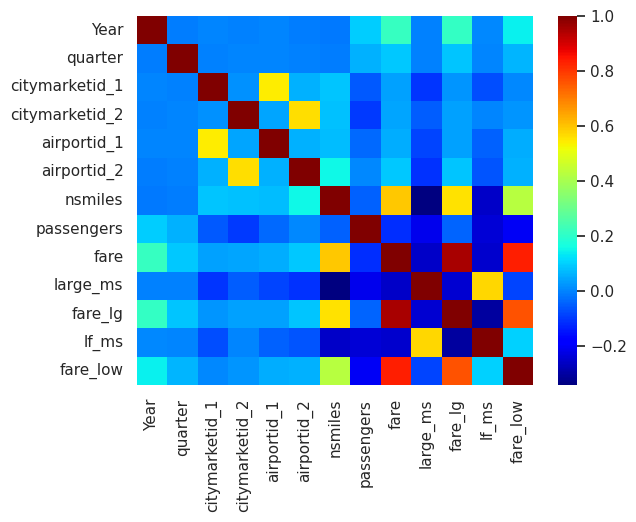

In [ ]:
 import seaborn as sns
sns.heatmap(numerical_df.corr(), cmap='jet')

**Correlación pasajeros y tarifas**
Se puede ver como esta correlacionado inversamente proporcional entre menor es la tarifa mayor es el numero de pasajeros.

(0.0, 7000.0)

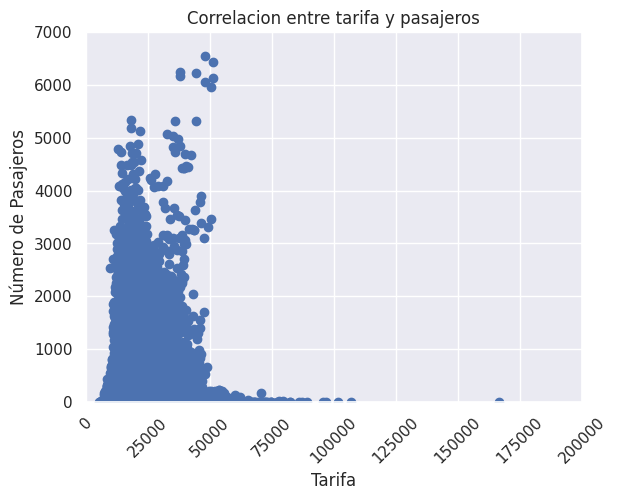

In [ ]:
plt.scatter( df_filtered['fare'], df_filtered['passengers'])
plt.xticks(rotation=45)
plt.title('Correlacion entre tarifa y pasajeros')
plt.xlabel('Tarifa')
plt.ylabel('Número de Pasajeros')
plt.xlim(0, 200000)
plt.ylim(0, 7000)

In [ ]:
df2=df_filtered[['quarter', 'Year','fare']].groupby(by=['quarter','Year']).mean().reset_index()
# Map quarter number to end of quarter month
quarter_to_month = {1: '31/03', 2: '30/06', 3: '30/09', 4: '31/12'}
# Convert quarter to a datetime-like string
df2['quarter_str'] = df2['quarter'].map(quarter_to_month) + '/' + df2['Year'].astype(str)
# Convert the new column to datetime
df2['quarter_date'] = pd.to_datetime(df2['quarter_str'], format="%d/%m/%Y")
df2.head()

,quarter,Year,fare,quarter_str,quarter_date
0,1,2021,18449.420417,31/03/2021,2021-03-31
1,1,2022,21720.162500,31/03/2022,2022-03-31
2,1,2023,24838.799792,31/03/2023,2023-03-31
3,2,2021,20803.450181,30/06/2021,2021-06-30
4,2,2022,26806.306714,30/06/2022,2022-06-30


Text(0.5, 1.0, 'Comparacion de tarifas en trimestres')

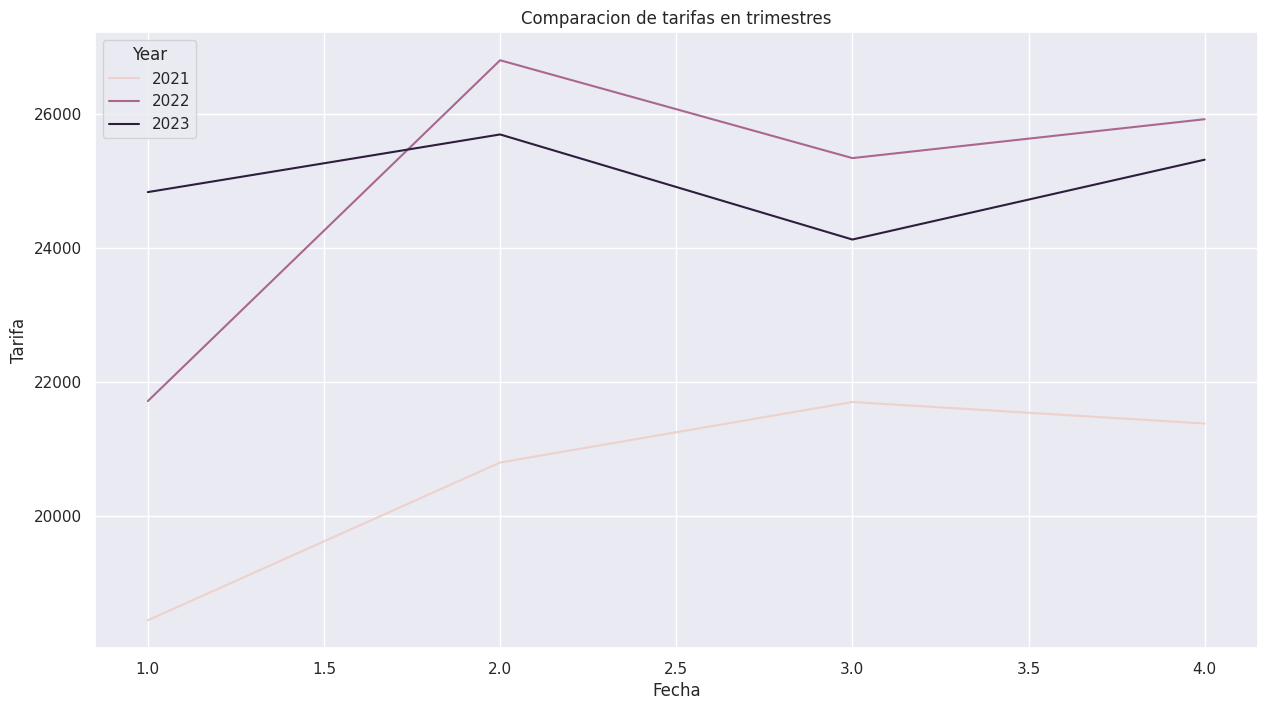

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,8))
sns.lineplot(x= df2.quarter, y= df2.fare, hue=df2.Year)
plt.xlabel('Fecha')
plt.ylabel('Tarifa')
plt.title('Comparacion de tarifas en trimestres')

In [ ]:
df5=df_filtered[['fare_low', 'fare', 'fare_lg']].groupby(by=['fare_low','fare']).mean().reset_index()

df5.head()

,fare_low,fare,fare_lg
0,5040.0,26741,26143.0
1,5200.0,23515,23126.0
2,5750.0,23350,33067.0
3,5800.0,5800,5800.0
4,5816.0,18678,19331.0


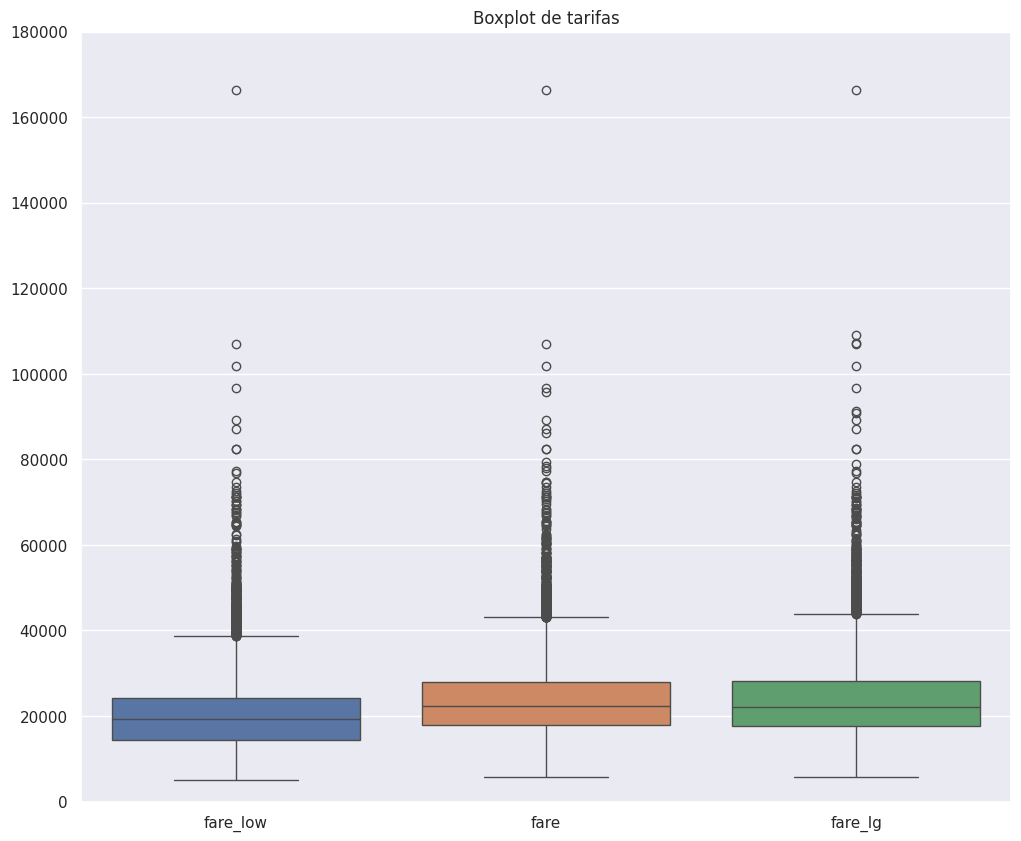

In [ ]:
import seaborn as sns

# Con atipicos
plt.figure(figsize=(12,10))
sns.boxplot(data=df5)
plt.ylim(0, 180000)
plt.title('Boxplot de tarifas')
plt.show()

Text(0, 0.5, 'Frecuencia')

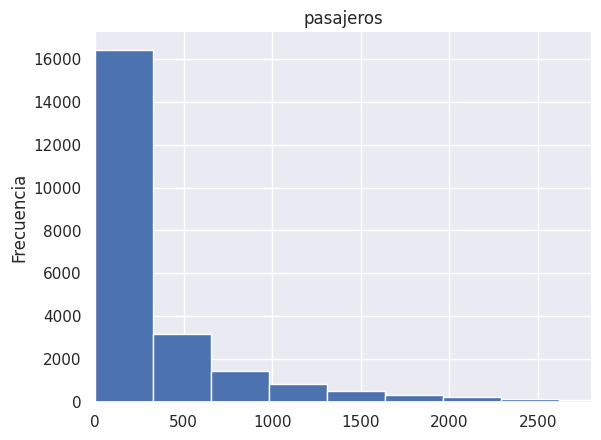

In [ ]:
from matplotlib import pyplot as plt
df_filtered['passengers'].plot(kind='hist', bins=20, title='pasajeros')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.xlim(0, 2800)
plt.ylabel('Frecuencia')


In [ ]:
temp=df.groupby(["quarter","carrier_lg"])["fare"].mean().reset_index()

(0.0, 30000.0)

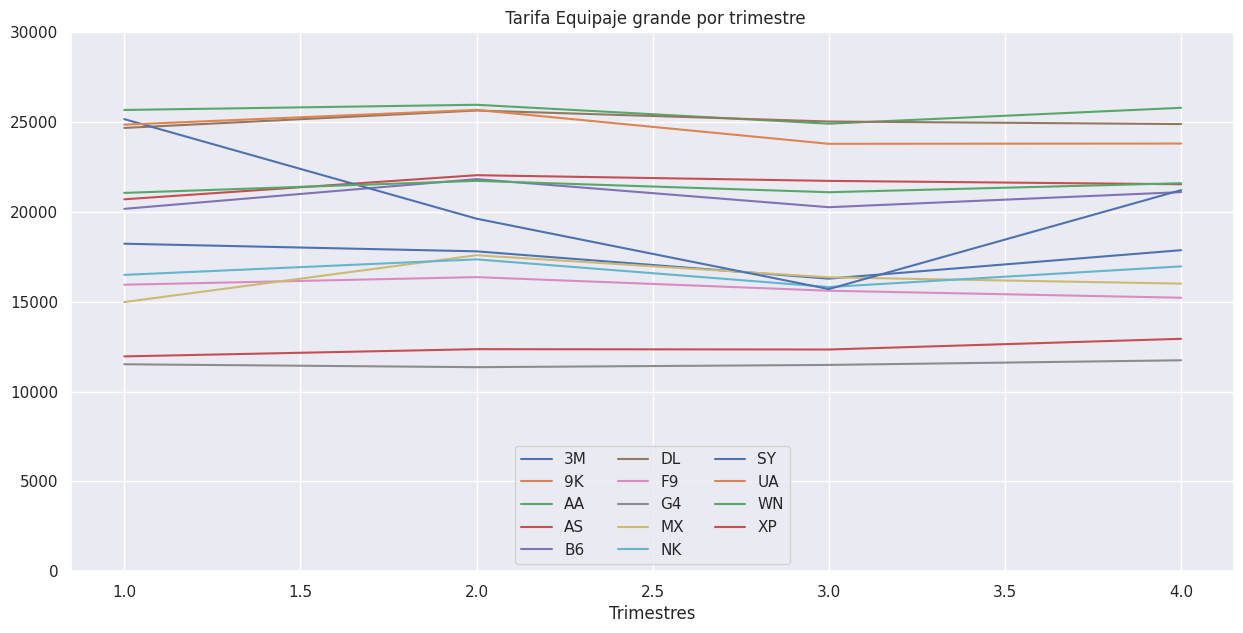

In [ ]:
temp.pivot(index="quarter", columns="carrier_lg", values="fare").plot(title= " Tarifa Equipaje grande por trimestre", figsize=(15,7))
plt.xlabel("Trimestres"); plt.legend(loc='lower center', ncol=3); plt.ylim(0, 30000)

In [ ]:
temp=df.groupby(["quarter","carrier_low"])["fare"].mean().reset_index()

(0.0, 30000.0)

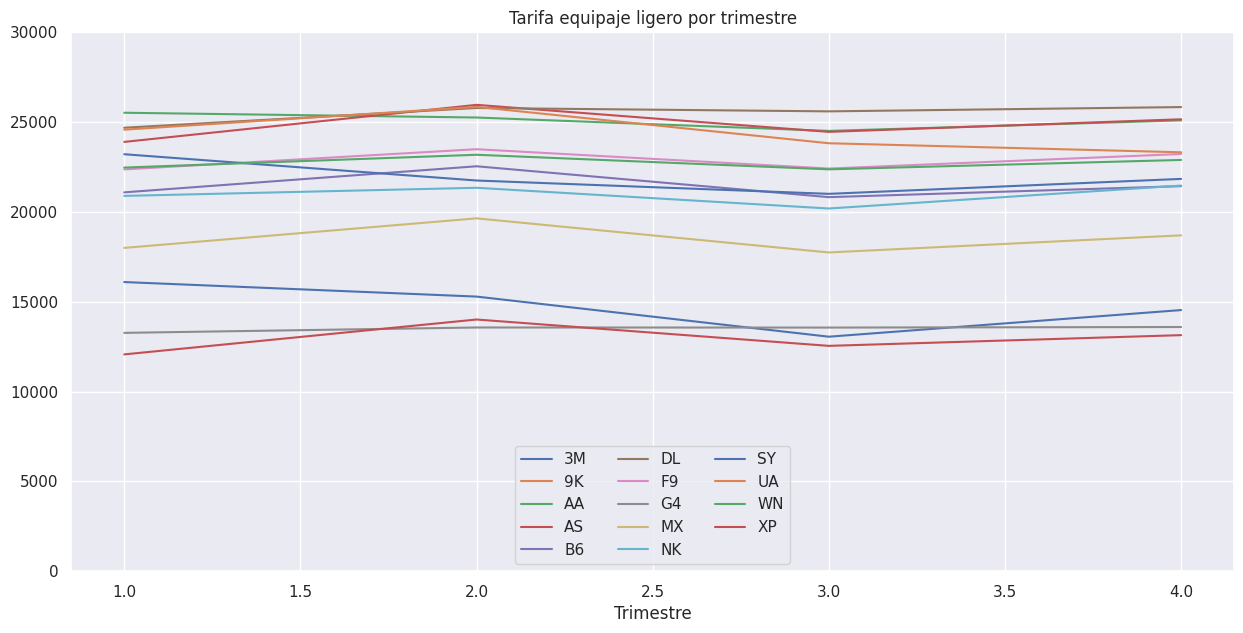

In [ ]:
temp.pivot(index="quarter", columns="carrier_low", values="fare").plot(title= "Tarifa equipaje ligero por trimestre", figsize=(15,7))
plt.xlabel("Trimestre"); plt.legend(loc='lower center', ncol=3); plt.ylim(0, 30000)

<ipython-input-22-9660b1fc3d62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vuelos_por_ciudad.index, y=vuelos_por_ciudad.values, palette='viridis')


Text(0.5, 1.0, 'Cantidad de Vuelos por Ciudad')

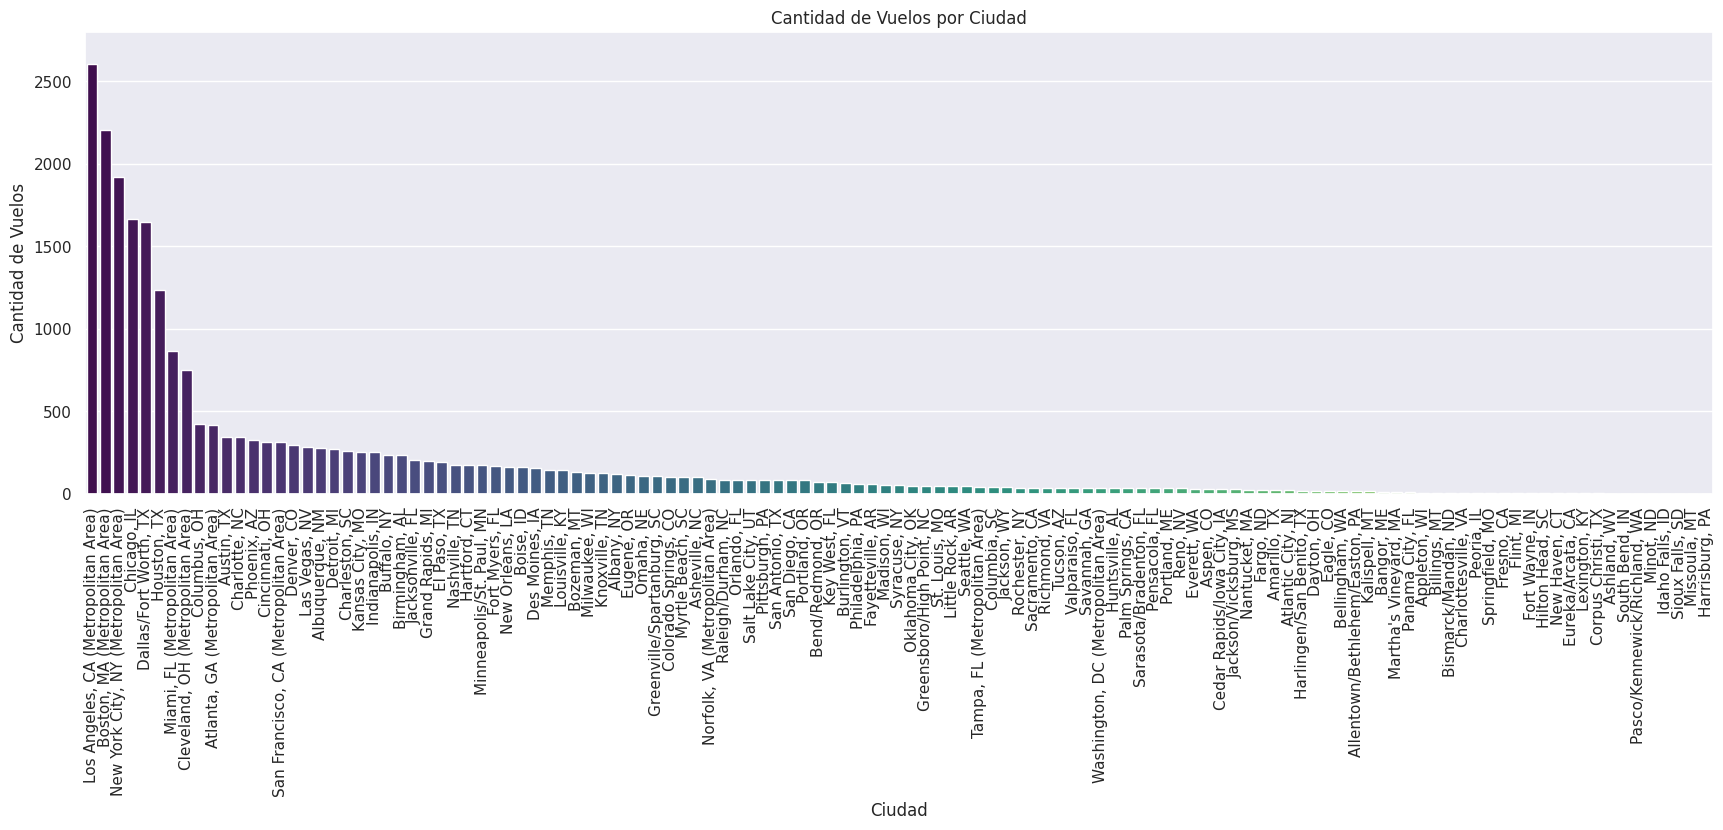

In [ ]:
vuelos_por_ciudad = df_filtered['city1'].value_counts()
plt.figure(figsize=(21, 6))
sns.barplot(x=vuelos_por_ciudad.index, y=vuelos_por_ciudad.values, palette='viridis')
plt.xticks(rotation=90)
plt.ylim(0, 2800)
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Vuelos')
plt.title('Cantidad de Vuelos por Ciudad')

(0.0, 990000.0)

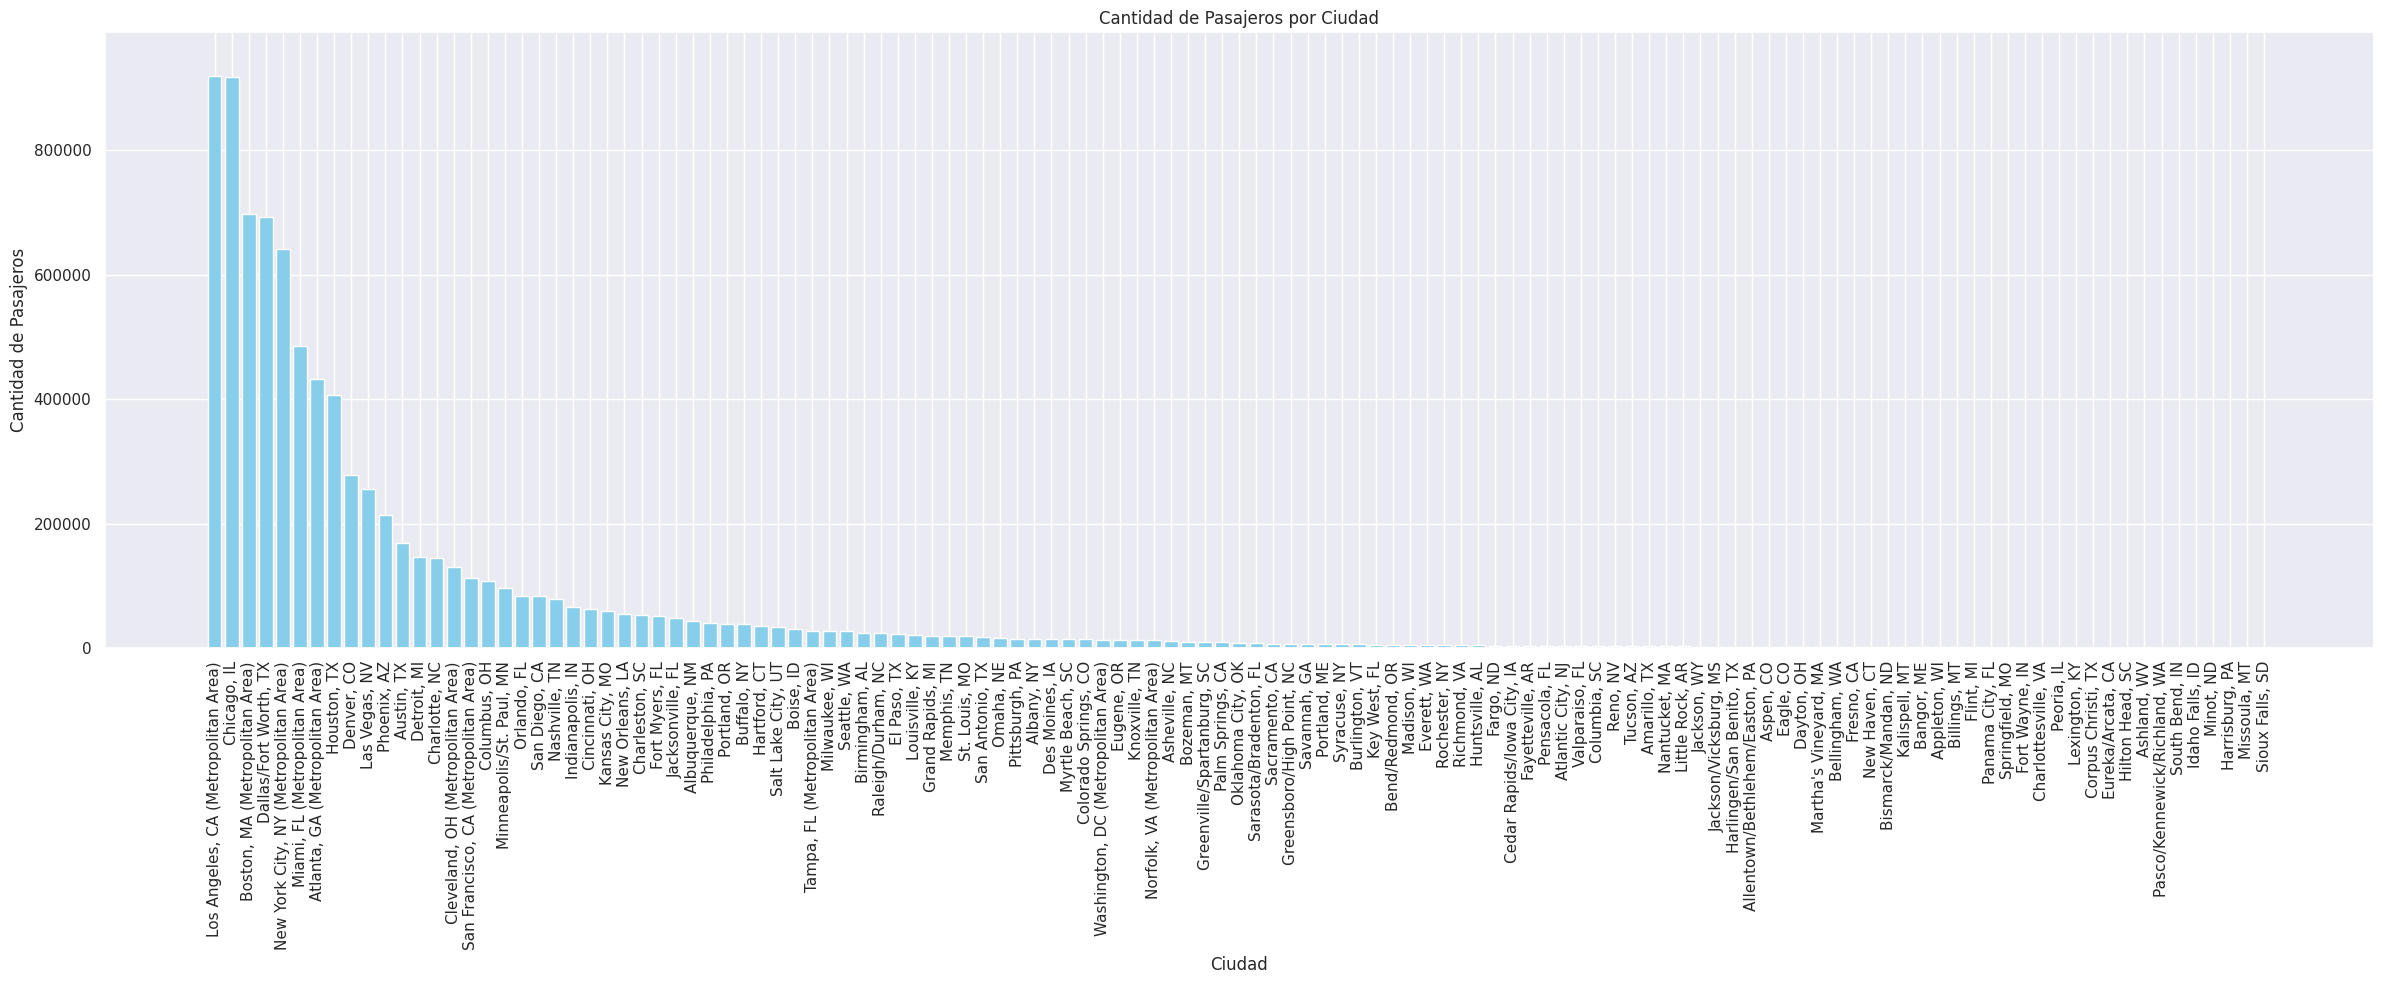

In [ ]:
passengers_by_city = df_filtered.groupby('city1')['passengers'].sum().reset_index()
passengers_by_city = passengers_by_city.sort_values(by='passengers', ascending=False)
plt.figure(figsize=(24, 10))
plt.bar(passengers_by_city['city1'], passengers_by_city['passengers'], color='skyblue')
plt.xticks(rotation=90)
plt.title('Cantidad de Pasajeros por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('Cantidad de Pasajeros')
plt.tight_layout()      # Ajustar el gráfico para que no se superpongan los elementos
plt.ylim(0, 990000)


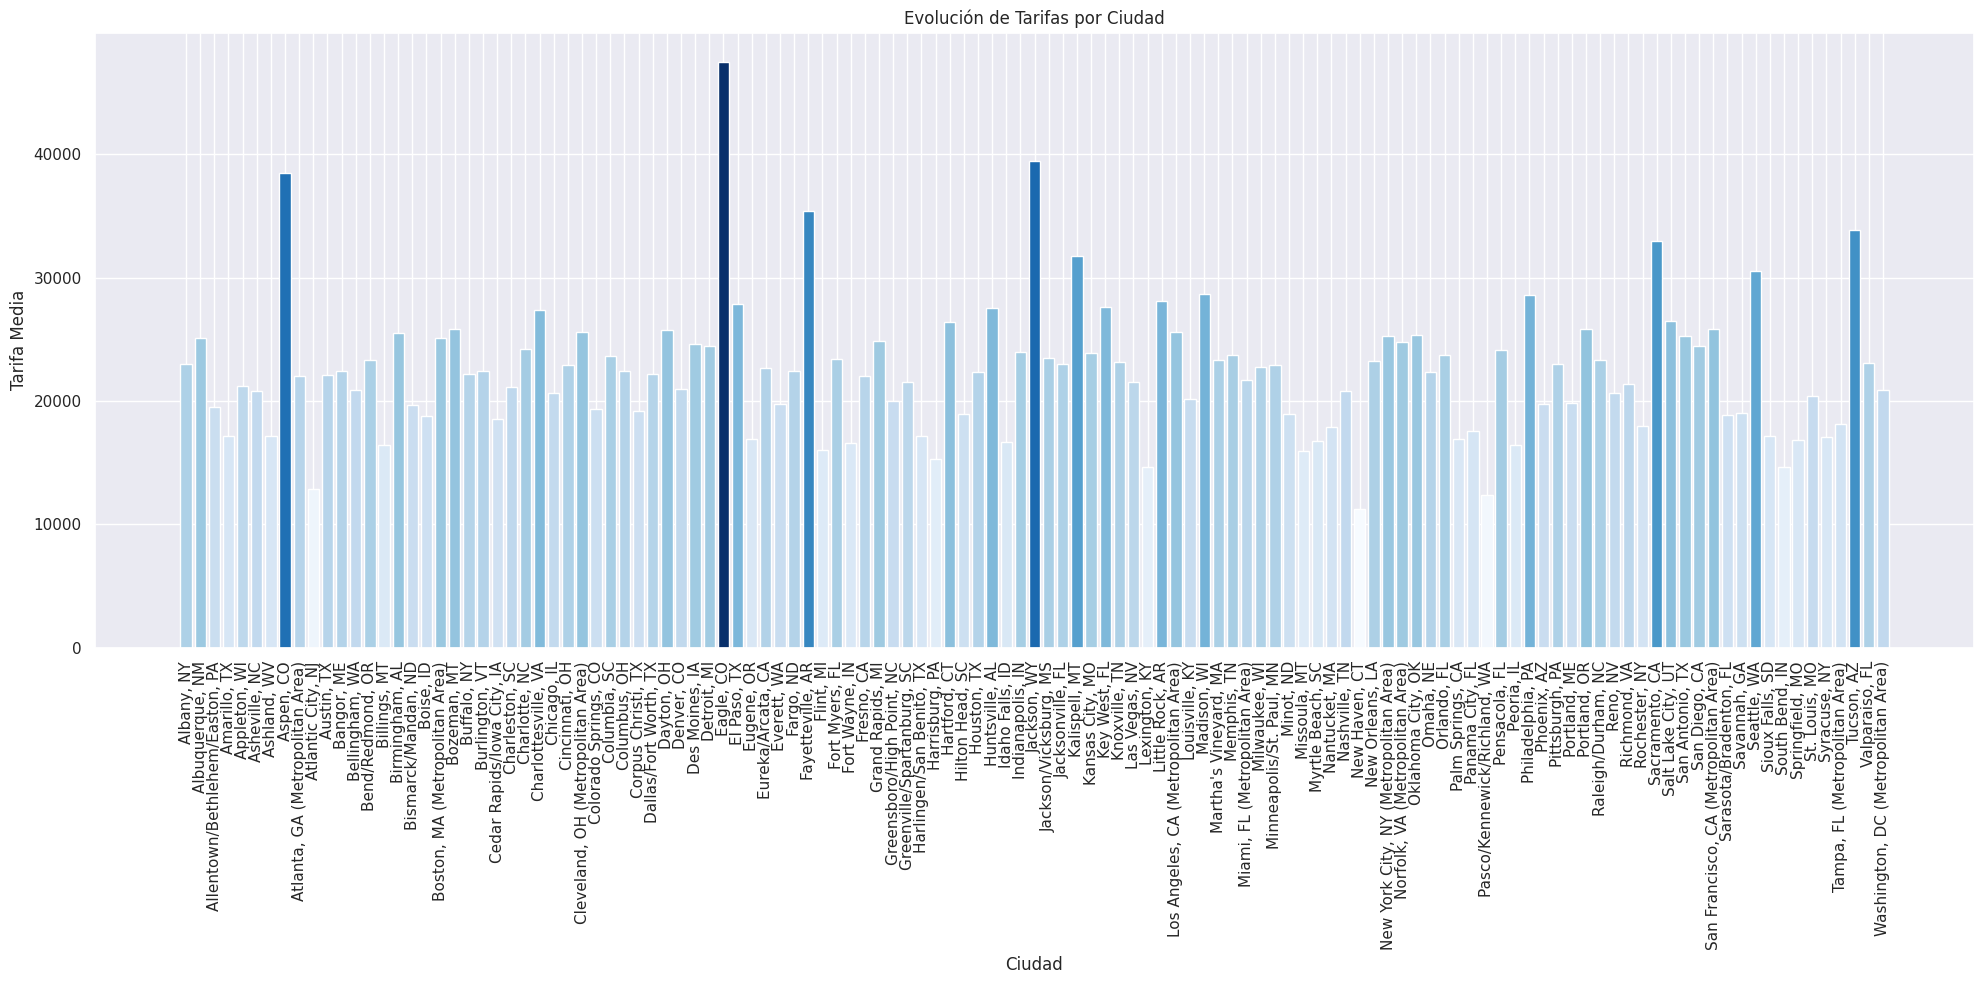

In [ ]:
df_grouped = df_filtered.groupby('city1')['fare'].mean().reset_index()
norm = plt.Normalize(df_grouped['fare'].min(), df_grouped['fare'].max())
colors = plt.cm.Blues(norm(df_grouped['fare']))

plt.figure(figsize=(20,10))
plt.bar(df_grouped['city1'], df_grouped['fare'], color=colors)
plt.xlabel('Ciudad')
plt.ylabel('Tarifa Media')
plt.title('Evolución de Tarifas por Ciudad')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
df_filtered1 = df[~df['Year'].isin([2019, 2020])]

# Mostrar las primeras filas del DataFrame filtrado
print("\nDatos Filtrados:")
print(df_filtered1.head())


Datos Filtrados:
                     tbl1apk  Year  quarter  citymarketid_1  citymarketid_2  \
15668  202111014011259ABQDAL  2021        1           30140           30194   
15669  202111014011298ABQDFW  2021        1           30140           30194   
15670  202111014014107ABQPHX  2021        1           30140           30466   
15671  202111014010821ABQBWI  2021        1           30140           30852   
15672  202111014011278ABQDCA  2021        1           30140           30852   

                 city1                               city2  airportid_1  \
15668  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15669  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15670  Albuquerque, NM                         Phoenix, AZ        10140   
15671  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   
15672  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   

       airportid_2 airport_1 airport_2  nsmiles  passeng

In [ ]:
print(df_filtered1.shape)

(25260, 20)


In [ ]:
df_filtered2 = df_filtered1[~df['quarter'].isin([2, 3, 4])]

# Mostrar las primeras filas del DataFrame filtrado
print("\nDatos Filtrados:")
print(df_filtered2.head())


Datos Filtrados:
                     tbl1apk  Year  quarter  citymarketid_1  citymarketid_2  \
15668  202111014011259ABQDAL  2021        1           30140           30194   
15669  202111014011298ABQDFW  2021        1           30140           30194   
15670  202111014014107ABQPHX  2021        1           30140           30466   
15671  202111014010821ABQBWI  2021        1           30140           30852   
15672  202111014011278ABQDCA  2021        1           30140           30852   

                 city1                               city2  airportid_1  \
15668  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15669  Albuquerque, NM               Dallas/Fort Worth, TX        10140   
15670  Albuquerque, NM                         Phoenix, AZ        10140   
15671  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   
15672  Albuquerque, NM  Washington, DC (Metropolitan Area)        10140   

       airportid_2 airport_1 airport_2  nsmiles  passeng

<ipython-input-71-dfa32d4d4499>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_filtered2 = df_filtered1[~df['quarter'].isin([2, 3, 4])]


In [ ]:
df_filtered2.head(5)

,tbl1apk,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,airport_2,nsmiles,passengers,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low
15668,202111014011259ABQDAL,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,DAL,580,113,15008,WN,10000.0,15008.0,WN,10000.0,15008.0
15669,202111014011298ABQDFW,2021,1,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,DFW,580,100,16904,AA,9756.0,16833.0,AA,9756.0,16833.0
15670,202111014014107ABQPHX,2021,1,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,PHX,328,258,13636,WN,7257.0,13049.0,WN,7257.0,13049.0
15671,202111014010821ABQBWI,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,10821,ABQ,BWI,1670,37,18964,WN,7982.0,17567.0,WN,7982.0,17567.0
15672,202111014011278ABQDCA,2021,1,30140,30852,"Albuquerque, NM","Washington, DC (Metropolitan Area)",10140,11278,ABQ,DCA,1670,40,20277,AA,4266.0,20665.0,WN,3712.0,18273.0


In [ ]:
print(df_filtered2.shape)

(7570, 20)


In [ ]:
pasajeros_por_año = df_filtered2.groupby('Year')['passengers'].sum().reset_index()



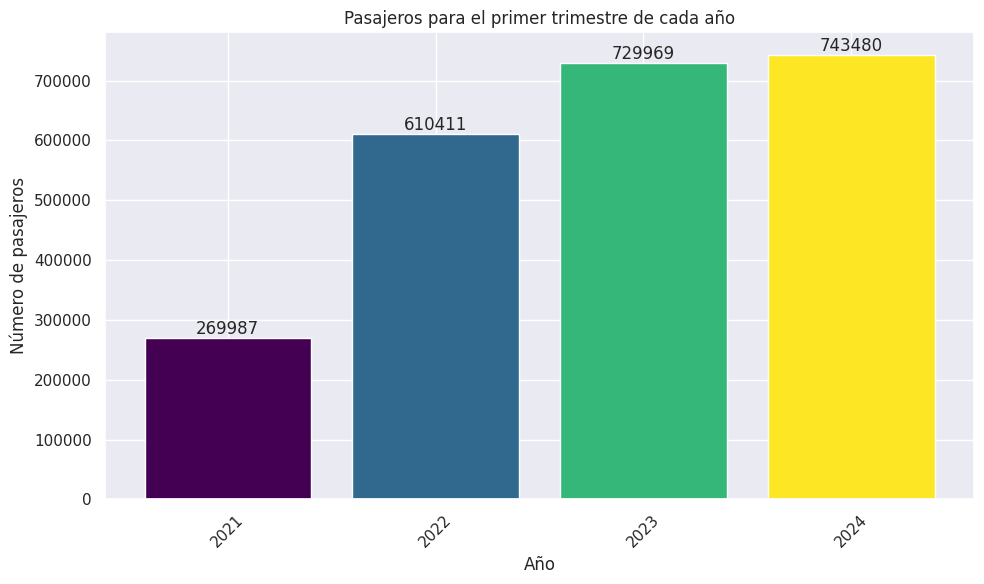

In [ ]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(pasajeros_por_año)))  # Genera una lista de colores

bars = plt.bar(pasajeros_por_año['Year'].astype(str),pasajeros_por_año['passengers'], color=colors)
plt.xlabel('Año')
plt.ylabel('Número de pasajeros')
plt.title('Pasajeros para el primer trimestre de cada año')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario

# Agregar el número de pasajeros encima de cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
             ha='center', va='bottom')  # Plasmar el número encima de la barra

plt.tight_layout()  # Ajustar diseño
plt.show()

In [ ]:
tarifa_por_año = df_filtered2.groupby('Year')['fare'].mean().reset_index()

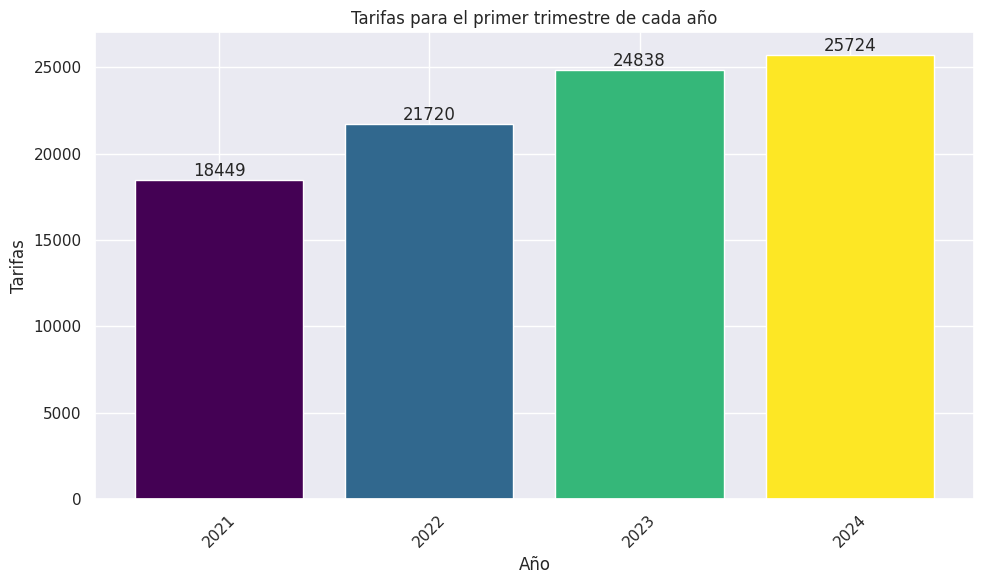

In [ ]:
plt.figure(figsize=(10, 6))
colors = plt.cm.viridis(np.linspace(0, 1, len(tarifa_por_año)))  # Genera una lista de colores

bars = plt.bar(tarifa_por_año['Year'].astype(str),tarifa_por_año['fare'], color=colors)
plt.xlabel('Año')
plt.ylabel('Tarifas')
plt.title('Tarifas promedio para el primer trimestre de cada año')
plt.xticks(rotation=45)  # Rotar las etiquetas del eje x si es necesario

# Agregar el número de pasajeros encima de cada barra
for bar in bars:
    yval = bar.get_height()  # Obtener la altura de la barra
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval),
             ha='center', va='bottom')  # Plasmar el número encima de la barra

plt.tight_layout()  # Ajustar diseño
plt.show()

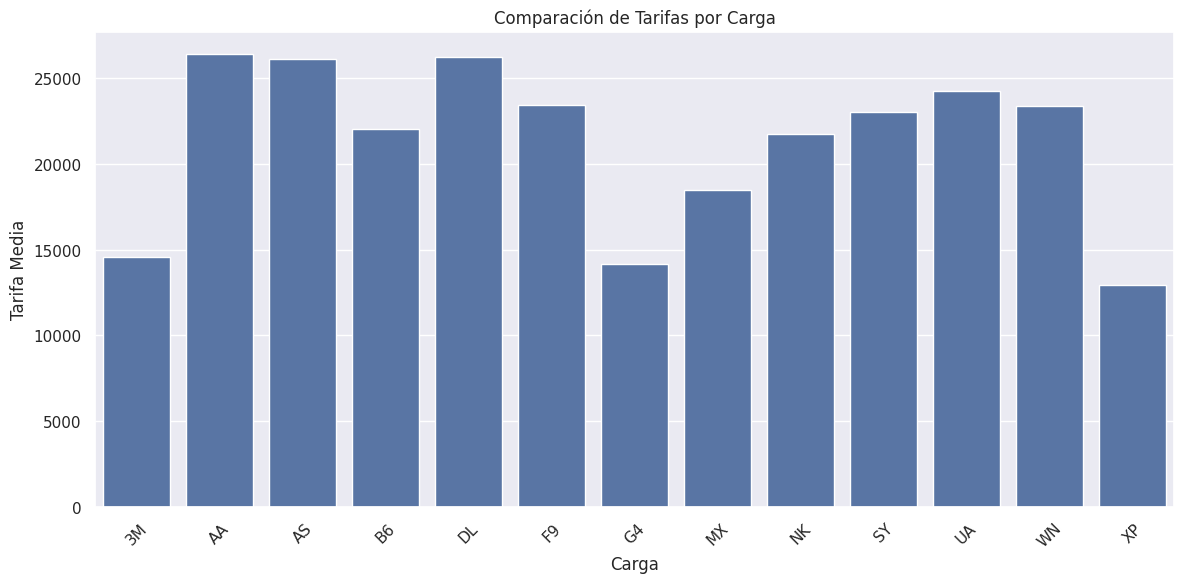

In [ ]:
df_grouped1= df_filtered.groupby('carrier_low')['fare'].mean().reset_index()

# Crear un gráfico de comparación
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped1, x='carrier_low', y='fare')
plt.title('Comparación de Tarifas por Carga')
plt.xlabel('Carga')
plt.ylabel('Tarifa') # Added missing ylabel
plt.ylabel('Tarifa Media')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

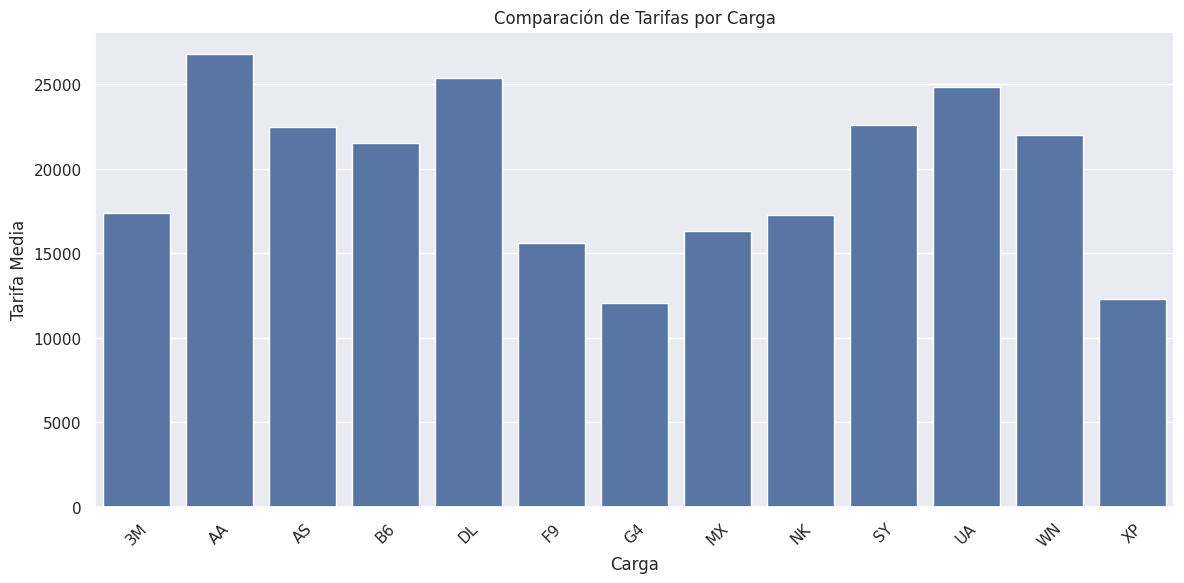

In [ ]:
df_grouped = df_filtered.groupby('carrier_lg')[''].mean().reset_index()

# Crear un gráfico de comparación
plt.figure(figsize=(12, 6))
sns.barplot(data=df_grouped, x='carrier_lg', y='fare')
plt.title('Comparación de Tarifas por Carga')
plt.xlabel('Carga')
plt.ylabel('Tarifa Media')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Cantidad de vuelos')

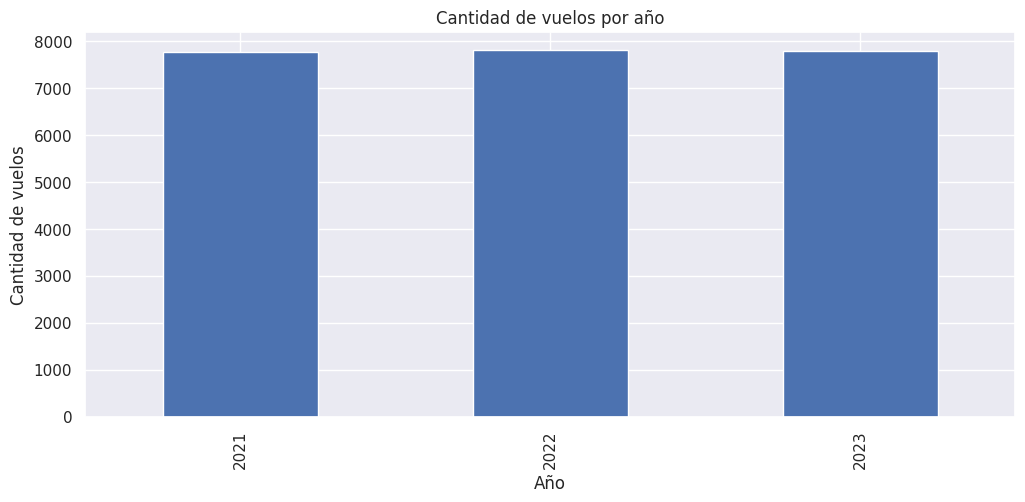

In [ ]:
plt.figure(figsize = (12,5))
df_filtered.groupby("Year").size().plot(kind="bar"); plt.title("Cantidad de vuelos por año")
plt.xlabel("Año"); plt.ylabel("Cantidad de vuelos")